In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2025-05-20 21:15:15.834157: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 21:15:15.843819: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 21:15:15.873844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747790115.930517  149871 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747790115.945139  149871 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747790115.985897  149871 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# ================================
# 1. Carregar dados reais e gerados
# ================================
df_all = pd.read_csv("/home/darkcover/Documentos/Gan/Data/df_all.csv")
df_generated = pd.read_csv("/home/darkcover/Documentos/Gan/Data/df_generated.csv")

df_real = df_all[df_all["source"] == "real"].copy()
X_real = df_real.iloc[:, :10].values.astype(np.float32)
y_real = df_real[["X", "Y"]].values.astype(np.float32)

In [3]:
# ================================
# 2. Treinar rede DNN para pseudo-label
# ================================
X_train, X_val, y_train, y_val = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

model_dnn = Sequential([
    Dense(30, activation='relu', input_shape=(10,)),
    Dense(20, activation='relu'),
    Dense(2)
    ])
model_dnn.compile(optimizer=Adam(0.01), loss='mse')
model_dnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=100, verbose=0)

/home/darkcover/.cache/pypoetry/virtualenvs/gan-oPyfrVEv-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-20 21:15:20.032553: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model_dnn.save("/home/darkcover/Documentos/Gan/Models/pseudo_label_dnn.h5")
print("✅ Modelo de pseudo-label salvo")

✅ Modelo de pseudo-label salvo


In [5]:
# ================================
# 3. Pseudo-label nos vetores gerados
# ================================
X_gen = df_generated.iloc[:, :10].values.astype(np.float32)
pseudo_coords = model_dnn.predict(X_gen, verbose=1)
df_generated[['X', 'Y']] = pseudo_coords

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


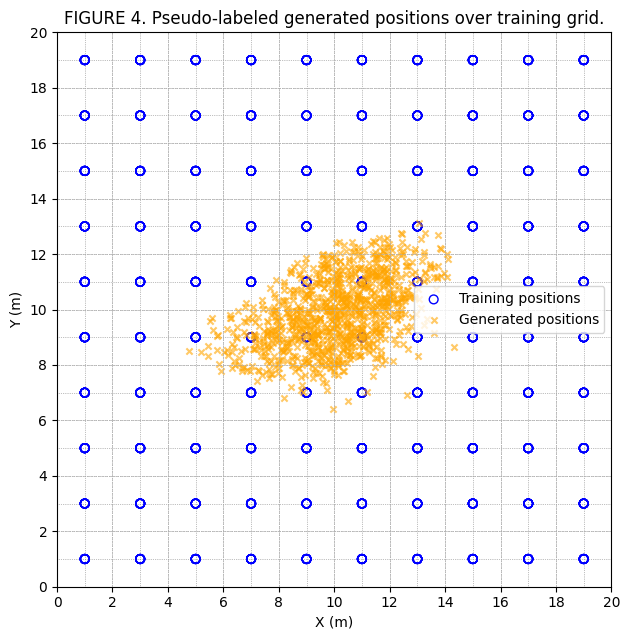

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados reais de treino (centralizados)
df_train = pd.read_csv("/home/darkcover/Documentos/Gan/Data/df_simulated.csv")

sample_1000 = df_generated.iloc[:1000]

# Criar gráfico
plt.figure(figsize=(6.5, 6.5))

# Treinamento: círculos vazados azuis
plt.scatter(df_train['X'], df_train['Y'],
            facecolors='none', edgecolors='blue', s=40, label='Training positions')

# Gerados: preenchidos em roxo
plt.scatter(sample_1000['X'], sample_1000['Y'],
            c='orange', marker='x', s=20, alpha=0.6, label='Generated positions')
# Sublinhas tracejadas de 1 em 1 metro (por cima dos pontos)
for x in np.arange(0, 21, 1):
    plt.axvline(x, color='gray', linestyle=':', linewidth=0.5, zorder=0)

for y in np.arange(0, 21, 1):
    plt.axhline(y, color='gray', linestyle=':', linewidth=0.5, zorder=0)

# Configurações visuais
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("FIGURE 4. Pseudo-labeled generated positions over training grid.")
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 21, 2))
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.tight_layout()
plt.show()


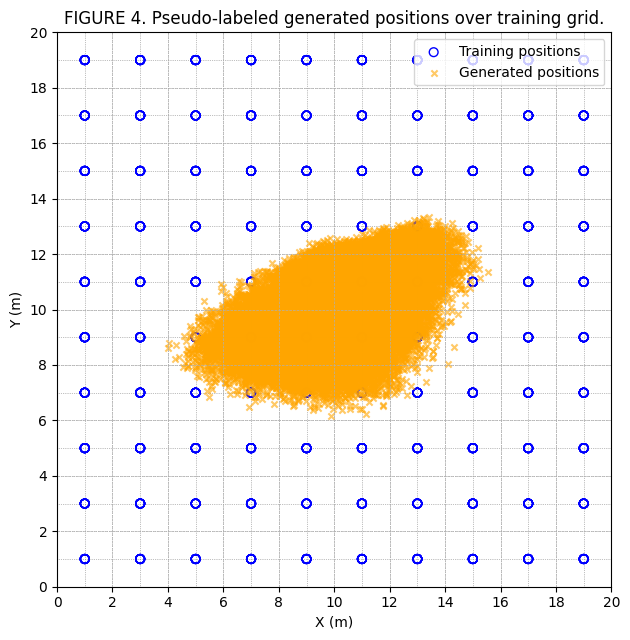

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados reais de treino (centralizados)
df_train = pd.read_csv("/home/darkcover/Documentos/Gan/Data/df_simulated.csv")

sample_1000 = df_generated

# Criar gráfico
plt.figure(figsize=(6.5, 6.5))

# Treinamento: círculos vazados azuis
plt.scatter(df_train['X'], df_train['Y'],
            facecolors='none', edgecolors='blue', s=40, label='Training positions')

# Gerados: preenchidos em roxo
plt.scatter(sample_1000['X'], sample_1000['Y'],
            c='orange', marker='x', s=20, alpha=0.6, label='Generated positions')
# Sublinhas tracejadas de 1 em 1 metro (por cima dos pontos)
for x in np.arange(0, 21, 1):
    plt.axvline(x, color='gray', linestyle=':', linewidth=0.5, zorder=0)

for y in np.arange(0, 21, 1):
    plt.axhline(y, color='gray', linestyle=':', linewidth=0.5, zorder=0)

# Configurações visuais
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("FIGURE 4. Pseudo-labeled generated positions over training grid.")
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0, 21, 2))
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf

# 1) Carrega as amostras geradas
df_generated = pd.read_csv('/home/darkcover/Documentos/Gan/Data/df_generated.csv')
wap_columns = [c for c in df_generated.columns if c.startswith('WAP')]

X_gen = df_generated[wap_columns].values.astype(np.float32)

# 2) Carrega o modelo regressor treinado nos dados reais
#    (ex: treinado em X_real,y_real na própria Fase 3)
model = tf.keras.models.load_model(
    '/home/darkcover/Documentos/Gan/Models/pseudo_label_dnn.h5',
    compile=False
)

# 3) Prediz as coordenadas
pred_coords = model.predict(X_gen, verbose=0)

# 4) Anexa as colunas de pseudo-rótulo
df_generated['LONGITUDE'] = pred_coords[:,0]
df_generated['LATITUDE']  = pred_coords[:,1]

# 5) Salva de volta para uso na Fase 4
df_generated.to_csv('/home/darkcover/Documentos/Gan/Data/df_generated_pseudo.csv', index=False)


In [10]:
df_generated.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,LONGITUDE,LATITUDE
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-52.131000,-97.930100,-60.247600,-89.294925,-63.500625,-94.420700,-70.493825,-97.648175,-93.546025,-67.002625,10.037706,9.903981
std,4.353879,5.075836,4.681441,4.961357,3.109902,5.060805,2.509307,5.459940,3.898392,4.002002,1.724494,1.243719
min,-64.000000,-110.000000,-71.000000,-110.000000,-72.000000,-110.000000,-79.000000,-110.000000,-110.000000,-78.000000,3.990654,6.160164
25%,-55.000000,-101.000000,-64.000000,-93.000000,-66.000000,-98.000000,-72.000000,-101.000000,-96.000000,-70.000000,8.866894,8.976322
50%,-53.000000,-98.000000,-61.000000,-89.000000,-64.000000,-94.000000,-71.000000,-97.000000,-93.000000,-67.000000,10.104205,9.870904
75%,-49.000000,-94.000000,-57.000000,-86.000000,-62.000000,-91.000000,-69.000000,-93.000000,-91.000000,-64.000000,11.266562,10.831815
max,-40.000000,-82.000000,-40.000000,-78.000000,-46.000000,-80.000000,-60.000000,-85.000000,-82.000000,-50.000000,15.545594,13.339489


In [11]:
df_generated.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,LONGITUDE,LATITUDE
0,-54,-94,-60,-97,-60,-100,-71,-96,-97,-71,12.596934,9.377690
1,-53,-95,-58,-96,-64,-94,-70,-94,-93,-72,11.546078,8.916157
2,-56,-94,-58,-95,-64,-93,-73,-96,-91,-73,10.771829,9.959242
3,-44,-104,-63,-92,-61,-100,-69,-101,-97,-61,11.109782,10.355710
4,-54,-101,-60,-87,-66,-101,-71,-91,-91,-70,7.718573,8.156986
